## 3. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.
 
You will have access to two types of time series data:
 1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast. These data usually cover a period of 1-4 years.
 2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**
1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Exploratory analysis:** You must do an exploratory analysis of the data. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. 
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
In addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 5, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

Load Data

************************************************** TASKS **************************************************

In [44]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Mast Risoe stored in .nc
dataset = nc.Dataset("risoe_m_all.nc", 'r')

# In Mast Risoe, remove all columns except ['ws77', 'wd77', 'ws125', 'wd125', 'time'] and create dataframe
ws77 = dataset.variables['ws77'][:]
wd77 = dataset.variables['wd77'][:]
ws125 = dataset.variables['ws125'][:]
wd125 = dataset.variables['wd125'][:]
time_minutes = dataset.variables['time'][:]

time = []
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0, tzinfo=pytz.timezone('Europe/Copenhagen'))
for minutes in time_minutes:
    time_delta = timedelta(minutes=int(minutes))
    timestamp = base_date_risoe + time_delta
    # Convert the time to UTC and account for summer time
    timestamp_utc = timestamp.astimezone(pytz.utc)
    time.append(timestamp_utc.strftime('%Y-%m-%d %H:%M:%S'))

mast_risoe_df = pd.DataFrame({
    'windSpeedAt77Meters': ws77,
    'windDirectionAt77Meters': wd77,
    'windSpeedAt125Meters': ws125,
    'windDirectionAt125Meters': wd125,
    'time': time
})
display(mast_risoe_df)

,windSpeedAt77Meters,windDirectionAt77Meters,windSpeedAt125Meters,windDirectionAt125Meters,time
0,3.36,205.0,3.04,208.0,1995-11-20 15:32:00
1,3.05,205.0,3.17,214.0,1995-11-20 15:42:00
2,3.59,204.0,3.64,209.0,1995-11-20 15:52:00
3,3.87,202.0,3.77,209.0,1995-11-20 16:02:00
4,4.74,201.0,4.28,212.0,1995-11-20 16:12:00
...,...,...,...,...,...
628354,6.04,0.0,NaN,0.0,2007-12-31 22:23:00
628355,6.97,0.0,NaN,0.0,2007-12-31 22:33:00
628356,8.17,0.0,NaN,0.0,2007-12-31 22:43:00
628357,6.66,0.0,NaN,0.0,2007-12-31 22:53:00


In [45]:
# Resample the data to be each hour
mast_risoe_df['time'] = pd.to_datetime(mast_risoe_df['time'])
mast_risoe_df.set_index('time', inplace=True)


display(mast_risoe_df)
wind_direction_2005 = mast_risoe_df.loc['2005', 'windDirectionAt77Meters':'windDirectionAt125Meters']

# Now you can display the DataFrame to inspect the wind direction data before resampling
display(wind_direction_2005)
resampled_df = mast_risoe_df.resample('1H')
resampled_df = resampled_df.agg({
    'windSpeedAt77Meters': 'mean',
    'windSpeedAt125Meters': 'mean'
})
# Filter the DataFrame for entries from the year 2005

def circular_mean(angles):
    # Check if all angles are 191.0
    if np.all((angles == 191.0) | (angles == 0.0)):
        return np.nan
    else:
        sin_sum = np.sum(np.sin(np.radians(angles)))
        cos_sum = np.sum(np.cos(np.radians(angles)))
        return np.degrees(np.arctan2(sin_sum, cos_sum)) % 360

resampled_df['windDirectionAt77Meters'] = mast_risoe_df['windDirectionAt77Meters'].resample('1H').apply(circular_mean)
resampled_df['windDirectionAt125Meters'] = mast_risoe_df['windDirectionAt125Meters'].resample('1H').apply(circular_mean)

resampled_df.reset_index(inplace=True)


mast_risoe_df = resampled_df
display(mast_risoe_df)



,windSpeedAt77Meters,windDirectionAt77Meters,windSpeedAt125Meters,windDirectionAt125Meters
time,,,,
1995-11-20 15:32:00,3.36,205.0,3.04,208.0
1995-11-20 15:42:00,3.05,205.0,3.17,214.0
1995-11-20 15:52:00,3.59,204.0,3.64,209.0
1995-11-20 16:02:00,3.87,202.0,3.77,209.0
1995-11-20 16:12:00,4.74,201.0,4.28,212.0
...,...,...,...,...
2007-12-31 22:23:00,6.04,0.0,NaN,0.0
2007-12-31 22:33:00,6.97,0.0,NaN,0.0
2007-12-31 22:43:00,8.17,0.0,NaN,0.0


,windDirectionAt77Meters,windSpeedAt125Meters,windDirectionAt125Meters
time,,,
2005-01-01 00:00:00,275.0,6.49,191.0
2005-01-01 00:10:00,278.0,6.93,191.0
2005-01-01 00:20:00,275.0,6.99,191.0
2005-01-01 00:30:00,282.0,7.03,191.0
2005-01-01 00:40:00,280.0,6.46,191.0
...,...,...,...
2005-12-31 23:11:00,119.0,3.36,191.0
2005-12-31 23:21:00,121.0,3.76,191.0
2005-12-31 23:31:00,120.0,3.92,191.0


,time,windSpeedAt77Meters,windSpeedAt125Meters,windDirectionAt77Meters,windDirectionAt125Meters
0,1995-11-20 15:00:00,3.333333,3.283333,204.666670,210.332754
1,1995-11-20 16:00:00,4.941667,4.940000,201.337294,209.500000
2,1995-11-20 17:00:00,6.096667,6.035000,202.666569,208.166831
3,1995-11-20 18:00:00,7.153333,7.038333,200.333719,205.666433
4,1995-11-20 19:00:00,7.955000,8.821667,197.834041,205.333296
...,...,...,...,...,...
106180,2007-12-31 19:00:00,8.533333,NaN,NaN,NaN
106181,2007-12-31 20:00:00,8.428333,NaN,NaN,NaN
106182,2007-12-31 21:00:00,8.485000,NaN,NaN,NaN
106183,2007-12-31 22:00:00,7.056667,NaN,NaN,NaN


In [46]:
# Load Meso Risoe stored in .csv
meso_risoe_df = pd.read_csv("meso_Risoe.csv")

# Keep only specific columns
meso_risoe_df = pd.DataFrame({
    "windSpeedAt120Meters": meso_risoe_df["WSP120"],
    "windDirectionAt120Meters": meso_risoe_df["WDIR120"],
    "windDirectionAt80Meters": meso_risoe_df["WDIR080"],
    "windSpeedAt80Meters": meso_risoe_df["WSP080"],
    "time": pd.to_datetime(meso_risoe_df["TIMESTAMP"],)
})

display(meso_risoe_df)

,windSpeedAt120Meters,windDirectionAt120Meters,windDirectionAt80Meters,windSpeedAt80Meters,time
0,1.88,99.34,94.47,1.77,2001-06-10 15:00:00
1,0.48,166.00,158.45,0.38,2001-06-10 16:00:00
2,0.93,310.79,313.49,0.93,2001-06-10 17:00:00
3,1.67,357.42,357.14,1.60,2001-06-10 18:00:00
4,5.98,24.14,19.64,5.50,2001-06-10 19:00:00
...,...,...,...,...,...
204283,10.36,216.21,214.93,9.30,2020-09-24 08:00:00
204284,10.67,215.43,213.96,9.47,2020-09-24 09:00:00
204285,9.43,230.43,229.81,8.84,2020-09-24 10:00:00
204286,9.38,233.10,232.81,8.82,2020-09-24 11:00:00


In [47]:
print("Number of rows in meso: " + str(len(meso_risoe_df)))
print("Number of rows in mast: " + str(len(mast_risoe_df)))

df = pd.merge(mast_risoe_df, meso_risoe_df, on="time").reset_index()
# df = pd.concat([meso_risoe_df.set_index('time'), mast_risoe_df.set_index('time')], axis=1, join='outer').reset_index()

print("Number of rows after merge: " + str(len(df)))

def handle_nan(value1, value2):
    if pd.isna(value1) or value1 == 0:
        return value2
    elif pd.isna(value2) or value2 == 0:
        return value1
    return None

filtered_df = df[(df['time'].dt.year == 2005)]

display(filtered_df["windDirectionAt125Meters"].max())
df['windSpeedAt125_120Meters'] = df.apply(
    lambda row: handle_nan(row['windSpeedAt125Meters'], row['windSpeedAt120Meters']) or
                np.mean([row['windSpeedAt125Meters'], row['windSpeedAt120Meters']]), axis=1)

df['windSpeedAt80_77Meters'] = df.apply(
    lambda row: handle_nan(row['windSpeedAt80Meters'], row['windSpeedAt77Meters']) or
                np.mean([row['windSpeedAt80Meters'], row['windSpeedAt77Meters']]), axis=1)

# define circular_mean as already
def circular_mean(angles):
    sin_sum = np.sum(np.sin(np.radians(angles)))
    cos_sum = np.sum(np.cos(np.radians(angles)))
    return np.degrees(np.arctan2(sin_sum, cos_sum)) % 360

df['windDirectionAt125_120Meters'] = df.apply(
    lambda row: handle_nan(row['windDirectionAt125Meters'], row['windDirectionAt120Meters']) or
                circular_mean([row['windDirectionAt125Meters'], row['windDirectionAt120Meters']]), axis=1)

df['windDirectionAt80_77Meters'] = df.apply(
    lambda row: handle_nan(row['windDirectionAt80Meters'], row['windDirectionAt77Meters']) or
                circular_mean([row['windDirectionAt80Meters'], row['windDirectionAt77Meters']]), axis=1)


Number of rows in meso: 204288
Number of rows in mast: 106185
Number of rows after merge: 70073


183.99850448651637

In [48]:
# Validation
for i in range(0, len(df), 10000):
    row = df.iloc[i]
    print(f"Row {i}:")
    print(row)

Row 0:
index                                             0
time                            2000-01-01 07:00:00
windSpeedAt77Meters                           6.485
windSpeedAt125Meters                           7.68
windDirectionAt77Meters                  184.170094
windDirectionAt125Meters                 185.499797
windSpeedAt120Meters                           6.58
windDirectionAt120Meters                     211.28
windDirectionAt80Meters                      209.09
windSpeedAt80Meters                            5.83
windSpeedAt125_120Meters                       7.13
windSpeedAt80_77Meters                       6.1575
windDirectionAt125_120Meters             198.389898
windDirectionAt80_77Meters               196.630047
Name: 0, dtype: object
Row 10000:
index                                         10000
time                            2001-02-20 23:00:00
windSpeedAt77Meters                       15.613333
windSpeedAt125Meters                      16.831667
windDirectionAt77Meters

In [49]:
# Drop unnecessary columns
df = df.drop([
    "windDirectionAt120Meters",
    "windDirectionAt80Meters",
    "windDirectionAt77Meters",
    "windSpeedAt120Meters",
    "windSpeedAt80Meters",
    "windSpeedAt77Meters"
], axis=1)

display(df)

,index,time,windSpeedAt125Meters,windDirectionAt125Meters,windSpeedAt125_120Meters,windSpeedAt80_77Meters,windDirectionAt125_120Meters,windDirectionAt80_77Meters
0,0,2000-01-01 07:00:00,7.680000,185.499797,7.130000,6.157500,198.389898,196.630047
1,1,2000-01-01 08:00:00,7.716667,191.999949,7.448333,6.219167,199.749974,198.035574
2,2,2000-01-01 09:00:00,7.925000,201.834083,7.832500,6.635000,204.382042,203.539483
3,3,2000-01-01 10:00:00,8.371667,198.333313,7.915833,6.730833,206.016656,204.083149
4,4,2000-01-01 11:00:00,7.896667,201.333262,7.618333,6.424167,210.556631,208.769808
...,...,...,...,...,...,...,...,...
70068,70068,2007-12-31 19:00:00,NaN,NaN,5.590000,6.856667,12.710000,12.000000
70069,70069,2007-12-31 20:00:00,NaN,NaN,5.380000,6.704167,7.280000,6.640000
70070,70070,2007-12-31 21:00:00,NaN,NaN,6.850000,7.427500,4.570000,3.340000
70071,70071,2007-12-31 22:00:00,NaN,NaN,7.380000,6.978333,9.680000,9.160000


 **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique.

In [50]:
# Missing values
missing_values_per_column = df.isnull().sum()
print("Missing Values Per Column Before Changes:")
print(missing_values_per_column)

# Using forward fill to replace the NaN values based on the most recent non-NaN value
# https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/
df.ffill(inplace=True)

missing_values_per_column = df.isnull().sum()
print("Missing Values Per Column After Changes:")
print(missing_values_per_column)

Missing Values Per Column Before Changes:
index                               0
time                                0
windSpeedAt125Meters            15580
windDirectionAt125Meters        18463
windSpeedAt125_120Meters            0
windSpeedAt80_77Meters              0
windDirectionAt125_120Meters        0
windDirectionAt80_77Meters          0
dtype: int64
Missing Values Per Column After Changes:
index                           0
time                            0
windSpeedAt125Meters            0
windDirectionAt125Meters        0
windSpeedAt125_120Meters        0
windSpeedAt80_77Meters          0
windDirectionAt125_120Meters    0
windDirectionAt80_77Meters      0
dtype: int64


In [51]:
# Add seasons as a feature to the  

df['month'] = df['time'].dt.month

def month_to_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'

df['season'] = df['month'].apply(month_to_season)
df = pd.concat([df, pd.get_dummies(df['season'], prefix='season')], axis=1)
df.drop(['season', 'month'], axis=1, inplace=True)

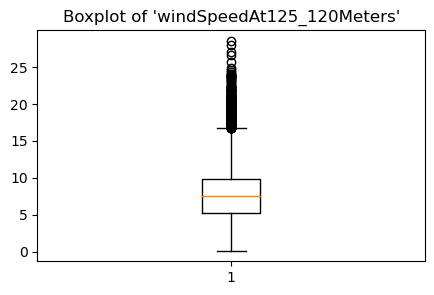

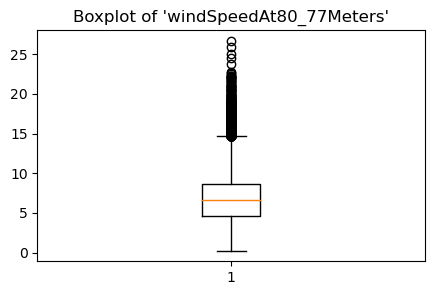

In [52]:
    # Analyze outliers via IQR (Interquartile Range)
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    for col in ["windSpeedAt125_120Meters", "windSpeedAt80_77Meters"]:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(5, 3))
            plt.boxplot(df[col])
            plt.title(f"Boxplot of '{col}'")
            plt.show()

**Exploratory analysis:** You must do an exploratory analysis of the data. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. 

In [53]:
print(df['windSpeedAt125_120Meters'])

0        7.130000
1        7.448333
2        7.832500
3        7.915833
4        7.618333
           ...   
70068    5.590000
70069    5.380000
70070    6.850000
70071    7.380000
70072    7.630000
Name: windSpeedAt125_120Meters, Length: 70073, dtype: float64


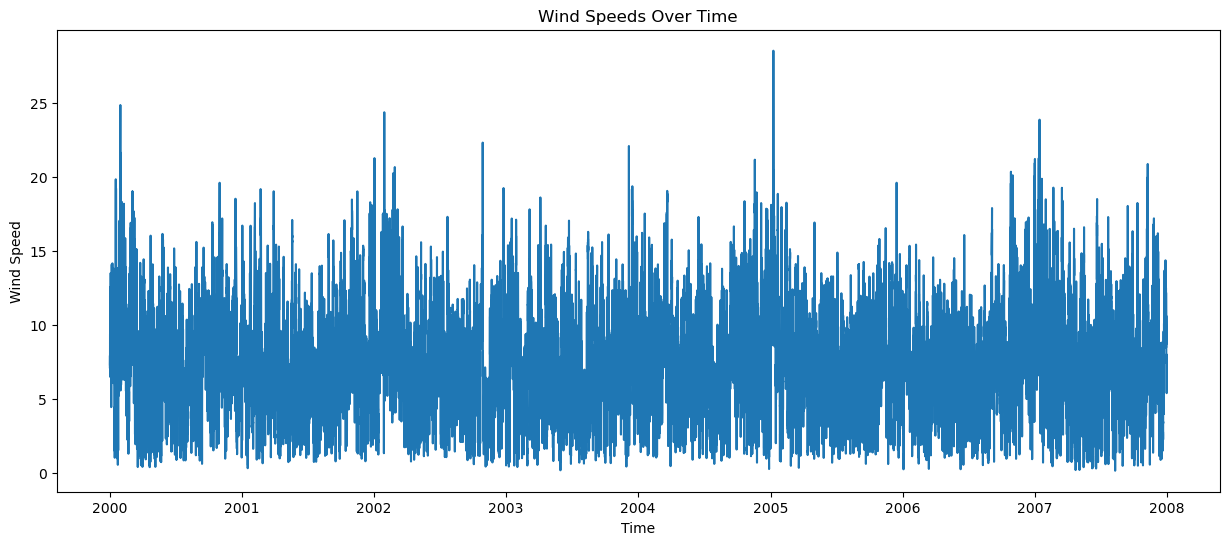

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['windSpeedAt125_120Meters'])
plt.title('Wind Speeds Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.show()

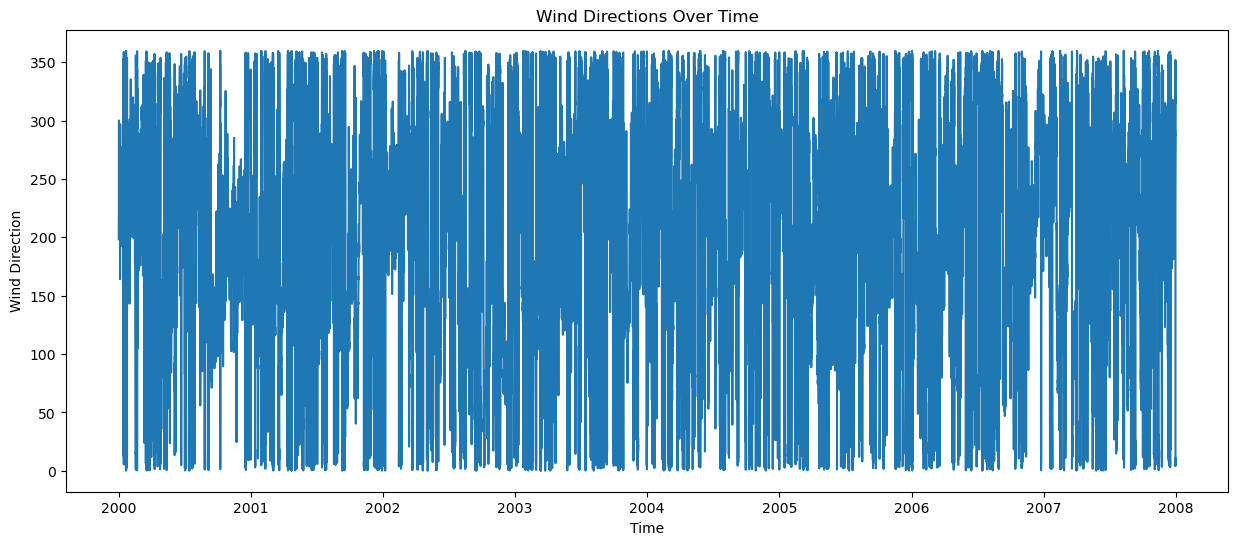

In [55]:
# First, ensure that the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Filter the DataFrame for the years 2005-2006
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['windDirectionAt125_120Meters'])
plt.title('Wind Directions Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Direction')
plt.show()


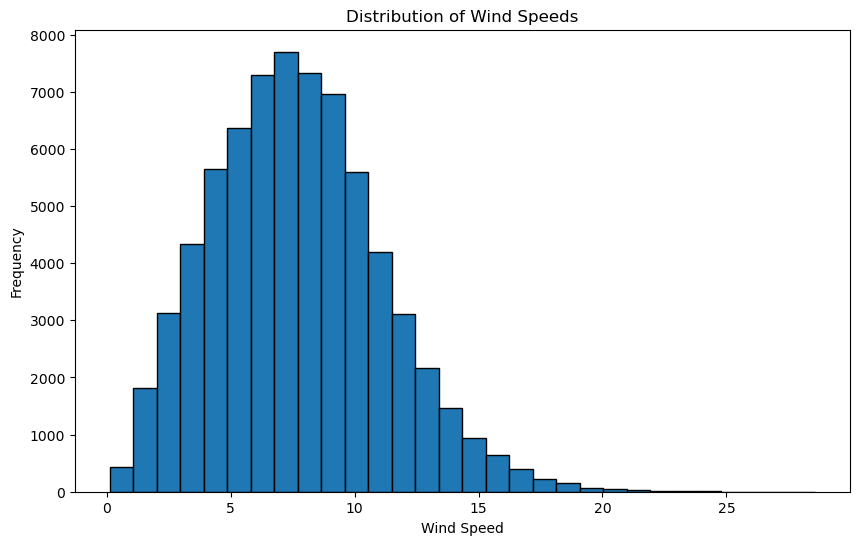

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['windSpeedAt125_120Meters'], bins=30, edgecolor='black')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()


In [57]:
correlation = df['windSpeedAt125_120Meters'].corr(df['windDirectionAt125_120Meters'])
print(f"Correlation between Wind Speed and Wind Direction: {correlation:.2f}")


Correlation between Wind Speed and Wind Direction: 0.08


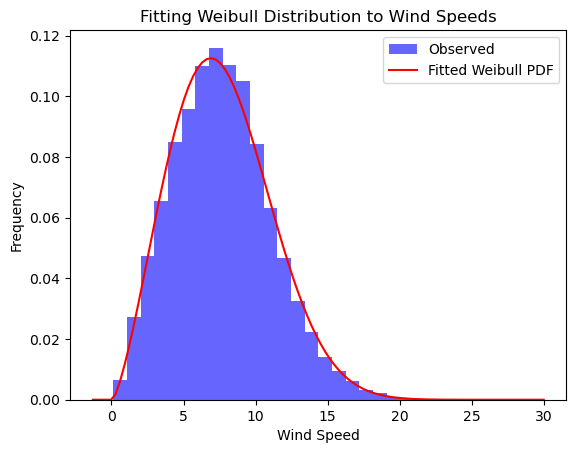

In [58]:
from scipy.stats import weibull_min

data = df['windSpeedAt125_120Meters']

params = weibull_min.fit(data)

plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Observed')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, weibull_min.pdf(x, *params), 'r', label='Fitted Weibull PDF')

plt.title('Fitting Weibull Distribution to Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.

In [59]:
# Linear Regression
X = df.drop(columns=['windSpeedAt125_120Meters', 'time', 'windSpeedAt80_77Meters'])
y = df['windSpeedAt125_120Meters']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
In addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R^2 Scores from Cross-validation: {scores}")
print(f"Average R^2 Score: {scores.mean()}")

Mean Squared Error: 6.531001255648547
R^2 Score: 0.440805712545426
R^2 Scores from Cross-validation: [ 0.26525529  0.45942029  0.68362417  0.34398863 -1.39635742]
Average R^2 Score: 0.0711861890934963


**Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.